In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
def faceDetection(test_img):
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')#Load haar classifier
    faces=face_haar_cascade.detectMultiScale(gray_img,scaleFactor=1.32,minNeighbors=5)#detectMultiScale returns rectangles
    return faces,gray_img

def labels_for_training_data(directory):
    faces=[]
    faceID=[]
    for path,subdirnames,filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print("Skipping system file")    #Skipping files that startwith .
                continue
            id=os.path.basename(path)         #fetching subdirectory names
            img_path=os.path.join(path,filename)           #fetching image path
            print("img_path:",img_path)
            print("id:",id)
            test_img=cv2.imread(img_path)                 #loading each image one by one
            if test_img is None:
                print("Image not loaded properly")
                continue
            faces_rect,gray_img=faceDetection(test_img)            #Calling faceDetection function to return faces detected in particular image
            if len(faces_rect)!=1:
                continue                 #Since we are assuming only single person images are being fed to classifier
            (x,y,w,h)=faces_rect[0]
            roi_gray=gray_img[y:y+w,x:x+h]            #cropping region of interest i.e. face area from grayscale image
            faces.append(roi_gray)
            faceID.append(int(id))
    return faces,faceID

#Below function trains haar classifier and takes faces,faceID returned by previous function as its arguments
def train_classifier(faces,faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    return face_recognizer

#Below function draws bounding boxes around detected face in image
def draw_rect(test_img,face):
    (x,y,w,h)=face
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=5)

#Below function writes name of person for detected label
def put_text(test_img,text,x,y):
    cv2.putText(test_img,text,(x,y),cv2.FONT_HERSHEY_DUPLEX,2,(0,255,0),4)

faces_detected: [[1065  997  263  263]
 [  38 1066  313  313]
 [ 535 1100  290  290]
 [1829 1886   68   68]
 [2219 1330  221  221]]
confidence: 33.63978235101875
label: 1
confidence: 32.67479010550216
label: 0
confidence: 34.27611434208941
label: 1
confidence: 103.14265229197834
label: 1
confidence: 51.87283029221541
label: 1


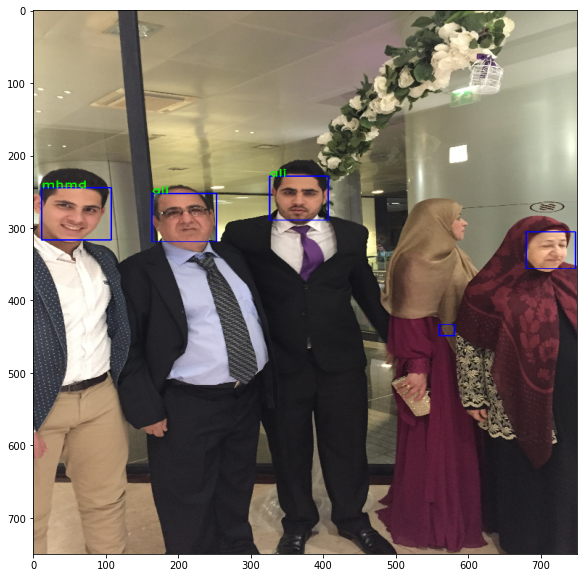

In [3]:
#This module takes images  stored in diskand performs face recognition
test_img=cv2.imread('test_images\IMG_5049.JPG')        #test_img path
faces_detected,gray_img=faceDetection(test_img)
print("faces_detected:",faces_detected)


#Comment belows lines when running this program second time.Since it saves training.yml file in directory
#faces,faceID=labels_for_training_data('faces_dataset')
#face_recognizer=train_classifier(faces,faceID)
#face_recognizer.write('trainingData.yml')


#Uncomment below line for subsequent runs
face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('trainingData.yml')#use this to load training data for subsequent runs

name={0:"mhmd",1:"ali"}#creating dictionary containing names for each label

for face in faces_detected:
    (x,y,w,h)=face
    roi_gray=gray_img[y:y+h,x:x+h]
    label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
    print("confidence:",confidence)
    print("label:",label)
    draw_rect(test_img,face)
    predicted_name=name[label]
    if(confidence>37):#If confidence more than 37 then don't print predicted face text on screen
        continue
    put_text(test_img,predicted_name,x,y)

resized_img=cv2.resize(test_img,(750,750))
#cv2.imshow("face dtecetion tutorial",resized_img)
resized_img=cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(resized_img)
plt.show()

#cv2.waitKey(1)#Waits indefinitely until a key is pressed
#cv2.destroyAllWindows

In [ ]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('trainingData.yml')#Load saved training data

name = {0 : "mhmd",1 : "ali"}


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    test_img = cv2.flip(test_img,1)
    faces_detected,gray_img=faceDetection(test_img)



    for (x,y,w,h) in faces_detected:
      cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)

    for face in faces_detected:
        (x,y,w,h)=face
        roi_gray=gray_img[y:y+w, x:x+h]
        label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
        print("confidence:",confidence)
        print("label:",label)
        draw_rect(test_img,face)
        predicted_name=name[label]
        if confidence < 57:#If confidence less than 37 then don't print predicted face text on screen
            put_text(test_img,predicted_name,x,y)


    resized_img = cv2.resize(test_img, (900, 600))
    cv2.imshow('face recognition tutorial ',resized_img)
    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break


cap.release()
cv2.destroyAllWindows

confidence: 56.811840850509725
label: 1
confidence: 55.92566714258686
label: 1
confidence: 45.50770973765073
label: 1
confidence: 46.96151773941974
label: 1
confidence: 49.07525278523952
label: 1
confidence: 46.900397142164955
label: 1
confidence: 53.33837854993224
label: 0
confidence: 47.9120457691987
label: 0
confidence: 44.4841382125542
label: 0
confidence: 43.52728607018456
label: 1
confidence: 47.616839265948435
label: 0
confidence: 49.51423267952522
label: 0
confidence: 49.00128921693455
label: 0
confidence: 48.444486383770204
label: 0
confidence: 47.33744965086589
label: 1
confidence: 42.25737243311911
label: 1
confidence: 40.79649726024765
label: 1
confidence: 40.885977622502985
label: 1
confidence: 40.71273819911867
label: 1
confidence: 41.20523215456586
label: 1
confidence: 54.06081499325895
label: 1
confidence: 52.471431132768906
label: 0
confidence: 42.662611480512396
label: 1
confidence: 45.49366117277676
label: 1
confidence: 48.27659630559833
label: 1
confidence: 47.07345